In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

## Read data from the dataset.

In [148]:
f = pd.read_csv('RAW_recipes.csv')

In [149]:
f.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [150]:
f.shape[0]

231637

## Most similar recipe

In [183]:
iPerR = defaultdict(set)
rPerI = defaultdict(set)

In [184]:
for j in range(f.shape[0]):
    ingredientList = eval(f["ingredients"][j])
    for i in range(len(ingredientList)):
        ingredient, recipe = ingredientList[i], f['name'][j]
        iPerR[recipe].add(ingredient)
        rPerI[ingredient].add(recipe)

In [185]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom

In [186]:
def mostSimilar_recipe(i):
    similarities = []
    ing = iPerR[i]
    for i2 in iPerR:
        if i2 == i: continue
        sim = Jaccard(ing, iPerR[i2])
        similarities.append((sim,i2))
    similarities.sort(key=lambda x: (-x[0]))
    return similarities[:5]

In [193]:
query = f['name'][500]

In [194]:
query

'perfect chocolate cake  mccall s cooking school'

In [244]:
iPerR['perfect chocolate cake  mccall s cooking school']

{'all-purpose flour',
 'baking powder',
 'baking soda',
 'boiling water',
 'butter',
 "confectioners' sugar",
 'eggs',
 'heavy cream',
 'light cream',
 'salt',
 'semisweet chocolate pieces',
 'sugar',
 'unsweetened cocoa',
 'vanilla',
 'vanilla extract'}

In [245]:
iPerR['tex mex chocolate sheet cake   the best']

{'all-purpose flour',
 'baking powder',
 'baking soda',
 'boiling water',
 'butter',
 'buttermilk',
 'eggs',
 'heavy cream',
 'mexican chocolate',
 'pecans',
 'salt',
 'sugar',
 'unsweetened cocoa',
 'vanilla extract'}

In [195]:
mostSimilar_recipe(query)

[(0.6111111111111112, 'tex mex chocolate sheet cake   the best'),
 (0.5333333333333333, 'wanda s cutout cream cookies'),
 (0.5294117647058824, 'hershey s chocolate chocolate cake'),
 (0.5294117647058824, 'rich chocolate cake'),
 (0.5263157894736842, 'best chocolate cake with creamy chocolate frosting')]

## Most similar ingredient

In [181]:
def mostSimilar_ingredient(i):
    similarities = []
    reci = rPerI[i]
    for i2 in rPerI:
        if i2 == i: continue
        sim = Jaccard(reci, rPerI[i2])
        similarities.append((sim,i2))
    similarities.sort(key=lambda x: (-x[0], x[1]))
    return similarities[:5]

In [264]:
mostSimilar_ingredient('cherries')

[(0.02, 'grenadine'),
 (0.01702127659574468, 'blue curacao'),
 (0.016304347826086956, 'cherry juice'),
 (0.015957446808510637, 'kirsch'),
 (0.015086206896551725, 'orange slice')]

## Recommendation

### Just use similarity

In [196]:
ing = {'fcinnamon', 
      'cherries', 
      'butterscotch', 
      'vodkag'}

In [198]:
similarities2 = []
for i2 in iPerR:
    sim = Jaccard(ing, iPerR[i2])
    similarities2.append((sim,i2,iPerR[i2]))
similarities2.sort(key=lambda x: (-x[0]))
for j in range(5):
    print(similarities2[j])

(0.16666666666666666, '3 ingredient dump cake', {'yellow cake mix', 'cherries', 'butter'})
(0.16666666666666666, 'alli s rob roy', {'scotch', 'cherries', 'sweet vermouth'})
(0.16666666666666666, 'dark cherry cream syrup', {'sugar', 'whipping cream', 'cherries'})
(0.16666666666666666, 'dark fruit salad', {'light brown sugar', 'cherries', 'light vanilla yogurt'})
(0.16666666666666666, 'easy orange julius', {'milk', 'cherries', 'orange juice'})


### Rank all the ingredients

In [203]:
ingredients = []
for i in range(f.shape[0]):
    ingredients.extend(eval(f['ingredients'][i]))

In [205]:
dict = {}
for key in ingredients:
    dict[key] = dict.get(key, 0) + 1

In [206]:
ingredients_sort = sorted(dict.items(), key=lambda x: x[1], reverse=True)

In [207]:
ingredient_top50 = []
for i in range(50):
    ingredient_top50.append(ingredients_sort[i][0])

In [246]:
ingredient_top50[0:10]

['salt',
 'butter',
 'sugar',
 'onion',
 'water',
 'eggs',
 'olive oil',
 'flour',
 'milk',
 'garlic cloves']

In [249]:
dict['sugar']

44535

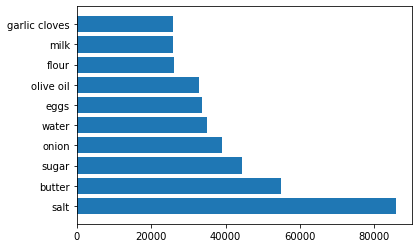

In [256]:
num_list = [dict[i] for i in ingredient_top50[0:10]]
plt.barh(range(len(num_list)), num_list, tick_label = ingredient_top50[0:10])
plt.savefig('top10.jpg')
plt.show()

Now the problem is that some ingredients does not exist in the dataset. We need to find similar ingredients.
What I did in this step is to find some similar ingredients as new input.

In [227]:
new = []

In [228]:
s = 'butterscotch'
for i in dict:
    if s.find(i) != -1:
        if dict[i] > 300:
            new.append(i)   

In [229]:
s = 'fcinnamon'
for i in dict:
    if s.find(i) != -1:
        if dict[i] > 300:
            new.append(i) 

In [230]:
s = 'vodkag'
for i in dict:
    if s.find(i) != -1:
         if dict[i] > 300:
            new.append(i)

In [231]:
new

['butter', 'cinnamon', 'vodka']

In [232]:
dict2 = {}
for key in dict:
    if key.find('butterscotch') != -1:
        dict2[key] = dict[key]
ww = sorted(dict2.items(), key=lambda x: x[1], reverse=True)
if dict[ww[0][0]] > 300:
    new.append(ww[0][0])

In [233]:
dict3 = {}
for key in dict:
    if key == 'cinnamon': continue
    if key.find('cinnamon') != -1:
        dict3[key] = dict[key]
ww2 = sorted(dict3.items(), key=lambda x: x[1], reverse=True)
if dict[ww2[0][0]] > 300:
    new.append(ww2[0][0])

In [234]:
dict4 = {}
for key in dict:
    if key == 'vodka': continue
    if key.find('vodka') != -1:
        dict4[key] = dict[key]
ww3 = sorted(dict4.items(), key=lambda x: x[1], reverse=True)
if dict[ww3[0][0]] > 300:
    new.append(ww3[0][0])

In [235]:
new.append('cherries')

In [236]:
new

['butter',
 'cinnamon',
 'vodka',
 'butterscotch chips',
 'ground cinnamon',
 'cherries']

In [237]:
ing = set(new)

In [240]:
def similarity(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom

In [241]:
similarities2 = []
for i2 in iPerR:
    sim = similarity(ing, iPerR[i2])
    similarities2.append((sim,i2,iPerR[i2]))
similarities2.sort(key=lambda x: (-x[0]))
for j in range(5):
    print(similarities2[j])

(0.375, 'easy bake oven baked apple', {'butter', 'sugar', 'cinnamon', 'apple', 'ground cinnamon'})
(0.375, 'warm fruit', {'butter', 'cinnamon', 'blueberries', 'pears', 'cherries'})
(0.3333333333333333, 'easy bake oven butterscotch candy', {'butter', 'butterscotch chips'})
(0.3, 'sour cherry pie', {'butter', 'sugar', 'cinnamon', 'cherries', 'salt', 'minute tapioca', 'flour'})
(0.2857142857142857, '3 ingredient dump cake', {'yellow cake mix', 'cherries', 'butter'})
